## Gradient Boosting

In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd


# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score

In [3]:
import pickle

#Loading the training and test splits from the pickle file
with open('../data/train_test_data.pickle', 'rb') as file:
    train_test_split = pickle.load(file)

X_train_raw = train_test_split['X_train_raw']
y_train_raw = train_test_split['y_train_raw']
X_test_raw = train_test_split['X_test_raw']
y_test_raw = train_test_split['y_test_raw']

In [4]:
with open('../data/train_splits.pickle', 'rb') as file:
    split_data = pickle.load(file)

In [6]:
split_data.keys()

dict_keys(['random', 'stratified', 'udersample', 'oversample'])

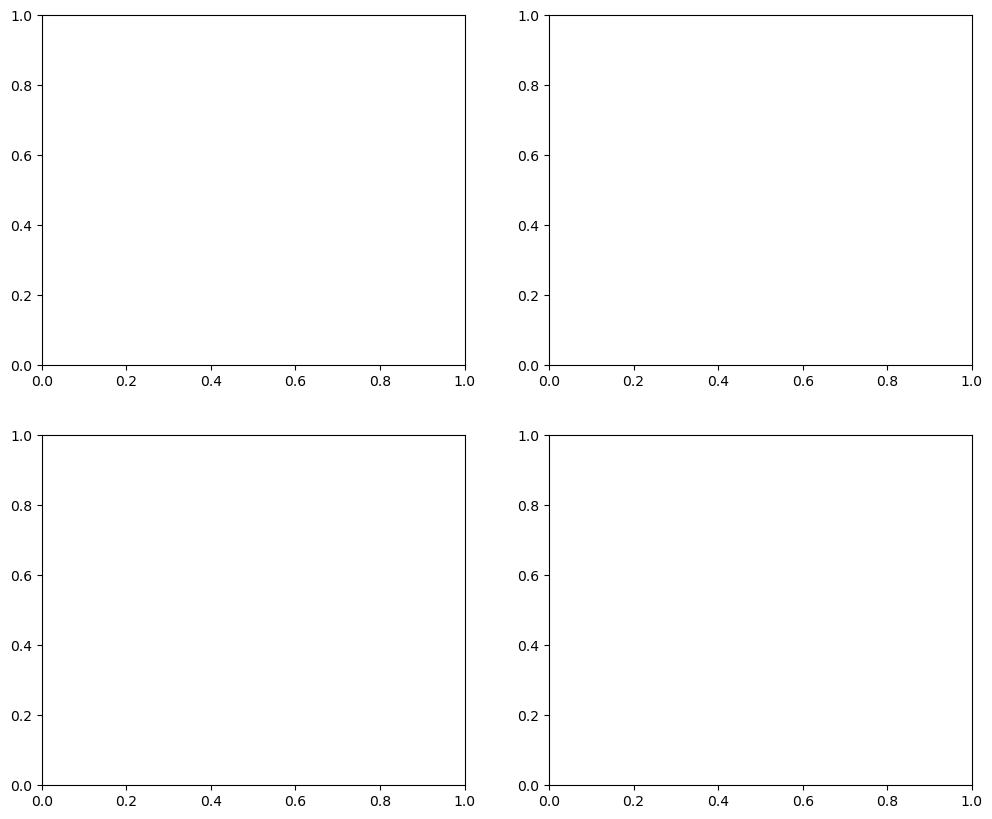

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

random - Validation Accuracy: 0.8100, Test Accuracy: 0.8150
random - Test Precision (Class 1): 1.0000
Test Recall (Class 1): 0.0898
Test F1-Score (Class 1): 0.1648
False Positives: 5, False Negatives: 365
stratified - Validation Accuracy: 0.8125, Test Accuracy: 0.8135
stratified - Test Precision (Class 1): 0.9643
Test Recall (Class 1): 0.0828
Test F1-Score (Class 1): 0.1525
False Positives: 2, False Negatives: 371
udersample - Validation Accuracy: 0.7419, Test Accuracy: 0.7010
udersample - Test Precision (Class 1): 0.4278
Test Recall (Class 1): 0.7006
Test F1-Score (Class 1): 0.5312
False Positives: 507, False Negatives: 91
oversample - Validation Accuracy: 0.7288, Test Accuracy: 0.7070
oversample - Test Precision (Class 1): 0.4104
Test Recall (Class 1): 0.6856
Test F1-Score (Class 1): 0.5135
False Positives: 484, False Negatives: 102


In [23]:
#We now need to create our Gradient Boosting Classification model

gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)

#Create somewhere to store performance
performance ={}

#Creating 2x2 grid for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
plt.figure(figsize=(8,6))

#ROC Curve Figure
plt.figure(figsize=(8,6))

#Fit model for each split
for idx, split in enumerate(split_data):
    X_train, X_val, y_train, y_val =split_data[split]
    
    #Train model
    gb_model.fit(X_train, y_train)
    
    #Predict on validation set
    y_val_pred = gb_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    #Predict on unseen test set
    y_test_pred = gb_model.predict(X_test_raw)
    test_accuracy = accuracy_score(y_test_raw, y_test_pred)

    #Get general classification report
    test_report = classification_report(y_val, y_val_pred, output_dict = True)

    #Plot confusion matrix for test set
    conf_matrix = confusion_matrix(y_test_raw, y_test_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    
    #Calculate balanced accuracy
    balanced_acc = balanced_accuracy_score(y_val, y_val_pred)

    #Precision, recall, and F1-score for class 1
    precision = test_report['1']['precision']
    recall = test_report['1']['recall']
    f1_score = test_report['1']['f1-score']

    #Define performance metrics
    performance[split] = {
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
         'test_precision_1': precision,
        'test_recall_1': recall,
        'test_f1_score_1': f1_score,
        'false_positives': fp,
        'false_negatives': fn,
        'balanced_accuracy': balanced_acc
    }

#Show the plots
plt.show()  

# Output performance metrics
for split, perf in performance.items():
    print(f"{split} - Validation Accuracy: {perf['val_accuracy']:.4f}, Test Accuracy: {perf['test_accuracy']:.4f}")
    print(f"{split} - Test Precision (Class 1): {perf['test_precision_1']:.4f}")
    print(f"Test Recall (Class 1): {perf['test_recall_1']:.4f}")
    print(f"Test F1-Score (Class 1): {perf['test_f1_score_1']:.4f}")
    print(f"False Positives: {perf['false_positives']}, False Negatives: {perf['false_negatives']}")